<a href="https://colab.research.google.com/github/getcontrol/deployment-linode/blob/master/Insurance%20-%20Model%20Training%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyCaret - Insurance Model Training 

This Notebook uses [PyCaret](https://www.pycaret.org/tutorials/html/REG101.html) to develop a machine learning pipeline. The pipeline includes preprocessing transformations and a regression model to predict patient hospitalization charges based on demographic and basic patient health risk metrics such as age, BMI, smoking status etc.

It illustrates a variey of ways to compare PyCaret's rebuilt  models performance before selecting the ideal one for your app. 

## Environment 

Make sure that you have created a virtual environment, installed all the dependencies , and activated that virtual environment in Jupyter:  

From Menu:  
1. Select Kernel 
2. Change Kernel 
3. select ipy-jupyter-venv3

## Import Data 
You can download the data from the [original source](https://github.com/pycaret/pycaret/blob/master/datasets/insurance.csv) and load it using pandas  or you can use PyCaret's data respository to load the data using the get_data() function, demonstrated here : 

In [1]:
from pycaret.datasets import get_data
dataset = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Check the shape of data**

In [2]:
dataset.shape

(1338, 7)

In order to demonstrate the predict_model() function on unseen data, a sample of 600 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 600 records are not available at the time when the machine learning experiment was performed.

In [3]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (1271, 7)
Unseen Data For Predictions: (67, 7)


## Setting up Environment in PyCaret  

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.  I've added some additional preprocessing tasks such as scaling and normalization, automatic feature engineering and binning continuous data into intervals. Read more about how preprocessing can [boost metrics](https://www.kdnuggets.com/2020/05/build-deploy-machine-learning-web-app.html) such as R2 score.

In [4]:
from pycaret.regression import *

/usr/local/lib/python3.8/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
dataset = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1271, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(889, 57)"


## Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using kfold cross validation for metric evaluation. The output prints a score grid that shows average MAE, MSE, RMSE, R2, RMSLE and MAPE accross the folds (10 by default) of all the available models in the model library.

In [7]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2557.8835,21582890.1761,4600.2196,0.8381,0.4390,0.3068,0.1030
ridge,Ridge Regression,2904.8257,22301451.8000,4683.9876,0.8338,0.4327,0.3248,0.0090
br,Bayesian Ridge,2906.2011,22293282.5445,4683.1482,0.8338,0.4328,0.3252,0.0100
llar,Lasso Least Angle Regression,2876.4583,22312870.8499,4683.0300,0.8333,0.4316,0.3235,0.0190
lasso,Lasso Regression,2903.4308,22400554.3000,4695.0722,0.8331,0.4345,0.3226,0.0110
lr,Linear Regression,2919.6617,22506581.0000,4707.0267,0.8323,0.4401,0.3254,0.7740
omp,Orthogonal Matching Pursuit,2867.7946,22754275.9785,4732.3199,0.8303,0.4189,0.3094,0.0130
lightgbm,Light Gradient Boosting Machine,2834.9992,23230364.5194,4781.3371,0.8263,0.5655,0.3586,0.2240
rf,Random Forest Regressor,2659.1180,23937730.1206,4857.7074,0.8218,0.4741,0.3370,0.2640
par,Passive Aggressive Regressor,1938.1706,23979129.8460,4856.6942,0.8216,0.3697,0.0801,0.0740


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Create a Model  

While compare_models() is a powerful function and often a starting point in any experiment, 
it does not return any trained models. PyCaret recommended experiment workflow is to 
use compare_models() right after setup to evaluate top performing models 
and finalize a few candidates for continued experimentation. 
As such, the function that actually allows to you create a model is unimaginatively called create_model(). 

This function creates a model and scores it using stratified cross validation. Similar to compare_models(), the output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

- Linear Regression ('lr')
- AdaBoost Regressor ('ada')
- Gradient Boosting Regressor ('gbr')

**Linear Regression**

In [8]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3078.0623,22854268.0000,4780.6138,0.8606,0.4329,0.3768
1,2920.9456,23240760.0000,4820.8672,0.8462,0.4133,0.2881
2,2403.4939,17544216.0000,4188.5815,0.8521,0.3897,0.2578
3,3500.9978,27423926.0000,5236.7856,0.8025,0.4842,0.3737
4,3230.0134,29469648.0000,5428.5952,0.8306,0.5125,0.3188
5,2677.0591,17319748.0000,4161.7002,0.7949,0.5181,0.3999
6,3071.7883,22050536.0000,4695.7998,0.8495,0.4055,0.3359
7,2538.7600,17396224.0000,4170.8779,0.8553,0.3568,0.2786
8,2527.0305,14747116.0000,3840.1975,0.9185,0.4138,0.3570
9,3248.4663,33019368.0000,5746.2480,0.7125,0.4742,0.2670


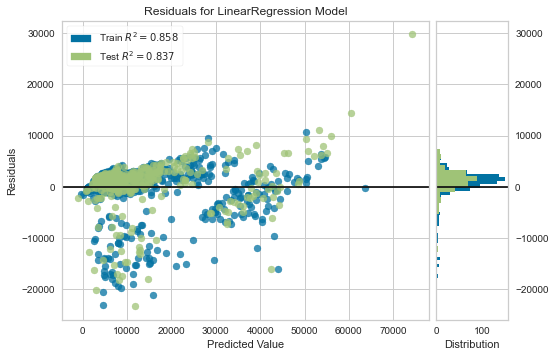

In [9]:
plot_model(lr)

**ADA Boost Regressor**

In [10]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4180.6279,25052470.6454,5005.2443,0.8472,0.6310,0.7545
1,4462.4727,27958665.5635,5287.5954,0.8149,0.6155,0.7227
2,3497.5177,21645185.6478,4652.4387,0.8176,0.5429,0.5531
3,4223.9944,31004778.1956,5568.1934,0.7767,0.5807,0.5652
4,5389.0966,38349510.7325,6192.6982,0.7795,0.6994,0.8795
5,4609.7716,27414294.2048,5235.8661,0.6753,0.7195,0.9476
6,4964.9470,34215491.5439,5849.4010,0.7664,0.7032,0.8939
7,4963.2921,31964981.7647,5653.7582,0.7342,0.7178,0.9462
8,4284.8601,23886150.1647,4887.3459,0.8680,0.7056,0.9228
9,5432.6082,38573265.7936,6210.7379,0.6642,0.6787,0.8345


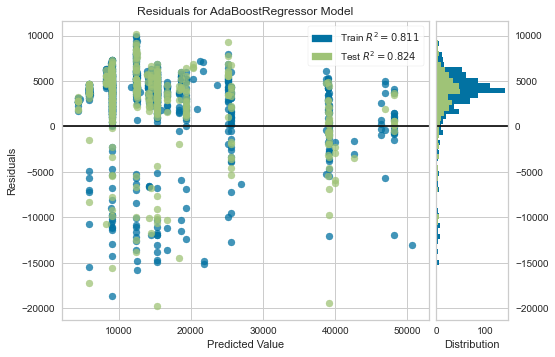

In [11]:
plot_model(ada)

**Gradient Boosting Regressor**

In [12]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2615.2516,19831543.4560,4453.2621,0.8790,0.3902,0.3165
1,2473.4263,18814440.2778,4337.5616,0.8755,0.4391,0.3160
2,2299.3967,17519886.5310,4185.6764,0.8524,0.3895,0.2450
3,2966.1511,29089077.4207,5393.4291,0.7905,0.5083,0.2904
4,2705.7680,25490596.8272,5048.8213,0.8535,0.5090,0.2957
5,2117.2227,15401916.6905,3924.5276,0.8176,0.3974,0.3145
6,2911.5798,24750730.8345,4975.0106,0.8310,0.4703,0.3713
7,2386.8441,19676600.5726,4435.8314,0.8364,0.3866,0.2965
8,2137.1658,12306727.2297,3508.0945,0.9320,0.4103,0.3524
9,2966.0290,32947381.9206,5739.9810,0.7132,0.4893,0.2692


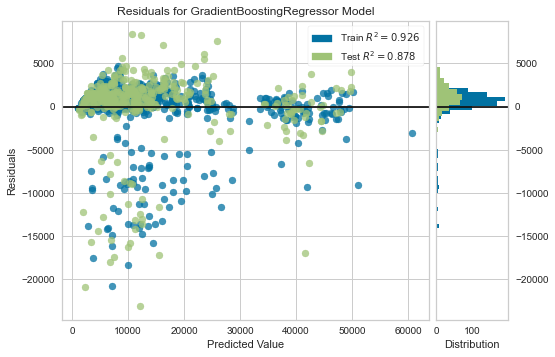

In [13]:
plot_model(gbr)

## Create a Model
Let's specify one model that can be deployed to our app. 

In [14]:
deploy_model  = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3078.0623,22854268.0000,4780.6138,0.8606,0.4329,0.3768
1,2920.9456,23240760.0000,4820.8672,0.8462,0.4133,0.2881
2,2403.4939,17544216.0000,4188.5815,0.8521,0.3897,0.2578
3,3500.9978,27423926.0000,5236.7856,0.8025,0.4842,0.3737
4,3230.0134,29469648.0000,5428.5952,0.8306,0.5125,0.3188
5,2677.0591,17319748.0000,4161.7002,0.7949,0.5181,0.3999
6,3071.7883,22050536.0000,4695.7998,0.8495,0.4055,0.3359
7,2538.7600,17396224.0000,4170.8779,0.8553,0.3568,0.2786
8,2527.0305,14747116.0000,3840.1975,0.9185,0.4138,0.3570
9,3248.4663,33019368.0000,5746.2480,0.7125,0.4742,0.2670


## Save | Load | Verify Model  
Give your model a unique name (i.e. change deploy_28082021 to today's date)

In [15]:
save_model(deploy_model, 'deploy_29082021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              n_jobs=-1, random_state=123, subclass='binary',
                              target='charges'

In [16]:
deploy_29082021 = load_model('deploy_29082021')

Transformation Pipeline and Model Successfully Loaded


In [17]:
deploy_29082021

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             n_jobs=-1, random_state=123, subclass='binary',
                             target='charges',
               